<a href="https://colab.research.google.com/github/jaewoo-cho/jaewoo/blob/master/45_tf_Tensor_vs_KerasTensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os


# tf.Tensor

# tf.Tensor (Tensorflow Tensor)
- **기본 Tensor 타입**으로, TensorFlow 연산에서 다루는 **실제 데이터**를 담고 있음.

- 연산 그래프에서 **계산 가능**한 값이며, Numpy처럼 연산이 가능한 다차원 배열.

- `tf.constant()`, `tf.Variable()`, 또는 어떤 '연산'의 결과로 만들어짐.


## tf.constant()

In [ ]:
tf.constant([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
tf.constant(((1,2,3), (4,5,6)))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
tensor = tf.constant(np.array([10,20,30]))
tensor

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([10, 20, 30])>

## Tensor의 정보

In [ ]:
tensor.shape

TensorShape([3])

In [ ]:
tensor.ndim

1

In [ ]:
tensor.dtype

tf.int64

In [ ]:
# 주의: Tensor 생성 할 때도 data type을 정해주지 않기 때문에 data type에 대한 혼동이 올 수 있음
# Data Type에 따라 모델의 무게나 성능 차이에도 영향을 줄 수 있음

# data type(dtype=)

In [ ]:
tf.constant([11,22,33], dtype=tf.uint8)

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([11, 22, 33], dtype=uint8)>

In [ ]:
tf.constant([11,22,33], dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([11., 22., 33.], dtype=float32)>

## data type 변환 (tf.cast)
- Numpy에서 astype()을 주었듯이, TensorFlow에서는 tf.cast를 사용


In [ ]:
tensor = tf.constant([11,22,33], dtype=tf.float32)
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([11., 22., 33.], dtype=float32)>

In [ ]:
tf.cast(tensor, dtype=tf.uint8)

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([11, 22, 33], dtype=uint8)>

# Tensor 안의 Numpy array 꺼내는 방법
- 방법1 : **.numpy()**
- 방법2 : **np.array()**


In [ ]:
tensor.numpy()

array([11., 22., 33.], dtype=float32)

In [ ]:
np.array(tensor)

array([11., 22., 33.], dtype=float32)

# 난수 생성

Numpy 에서도 'normal 혹은 uniform distribution' 으로 랜덤 데이터를 생성가능했다.

TensorFlow 도 `tf.random.uniform` 혹은 `tf.random.normal` 로 생성 가능



In [ ]:
tf.random.normal([9])

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([-1.4659086 , -1.5129033 ,  0.4935078 , -0.7510512 , -0.7190493 ,
       -1.7329754 ,  1.4954146 , -0.6185145 ,  0.36272982], dtype=float32)>

In [ ]:
tf.random.normal([3, 3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.40441856,  0.51535374, -0.13145274],
       [ 1.4024315 , -0.03157736, -0.65709245],
       [ 0.35583085,  0.71289146, -0.75816774]], dtype=float32)>

In [ ]:
tf.random.uniform([3, 3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.9140277 , 0.8576336 , 0.8390994 ],
       [0.67102766, 0.33092785, 0.4830736 ],
       [0.31561303, 0.6073779 , 0.38328886]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)
tf.random.normal([9])

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([ 0.3274685, -0.8426258,  0.3194337, -1.4075519, -2.3880599,
       -1.0392479, -0.5573232,  0.539707 ,  1.6994323], dtype=float32)>

# expand_dims(), tf.newaxis
- 차원추가
- 주로 사용되는 경우
  - batch dimension 등을 맞출때
  - boradcating: 계산하기 전에 맞춰야할 때

In [ ]:
x = tf.constant([1,2,3,4])
x #(4,)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [ ]:
tf.expand_dims(x, axis=0) # (4,) -> (1,4)

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 2, 3, 4]], dtype=int32)>

In [ ]:
tf.expand_dims(x, axis=1) # (4,) -> (4,1)

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3],
       [4]], dtype=int32)>

In [ ]:
x[tf.newaxis, :]

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 2, 3, 4]], dtype=int32)>

In [ ]:
x[tf.newaxis, :, tf.newaxis] #(4,) -> (1, 4, 1)

<tf.Tensor: shape=(1, 4, 1), dtype=int32, numpy=
array([[[1],
        [2],
        [3],
        [4]]], dtype=int32)>

# ■ KerasTensor (Keras symbolic tensor)

- Keras에서 모델을 구성할 때 사용하는 **symbolic tensor**입니다.

- `Input()`이나 Functional API로 모델을 구성할 때 내부적으로 사용됩니다.

- 아직 실제 값이 존재하지 않고, **모델의 입력/출력 구조**를 정의하기 위한 **placeholder 역할**을 합니다.
- 연산은 가능하지만, **실제로 값을 가지고 있는 게 아니라 연산의 "흐름"을 정의**한다


In [ ]:
x = keras.layers.Input(shape=(32,))
print(type(x))

<class 'keras.src.backend.common.keras_tensor.KerasTensor'>


## ⚠️ 사용 시 주의할 점

| 상황 | 주의할 점 |
|------|------------|
| `KerasTensor`를 사용할 때 | 일반 `TensorFlow` 연산을 막 사용하면 안 됩니다. Keras API (layers, models 등)로 처리해야 합니다. |
| `tf.function`과 함께 사용할 때 | `KerasTensor`는 그래프 외부에서 바로 사용할 수 없습니다. 오류 발생 가능성이 큼. |
| 값이 필요한 연산 (`numpy()`, `eval()`) | `KerasTensor`에서는 사용할 수 없습니다. 이는 실제 값이 없기 때문입니다. |
| 디버깅 | `KerasTensor`는 값을 출력할 수 없기 때문에 디버깅이 어려울 수 있습니다. 중간 값을 보기 위해선 Functional API 흐름 내에서 중간 출력을 모델로 만들어 확인해야 합니다. |

---

## ✅ 비교 요약

| 항목 | `tf.Tensor` | `KerasTensor` |
|------|-------------|---------------|
| 정의 | 실제 값이 있는 텐서 | 모델 구성 시 사용하는 symbolic 텐서 |
| 생성 | `tf.constant`, 연산 결과 등 | `Input()` 또는 layer 호출 결과 |
| 용도 | 연산, 모델 학습, 추론 등 | 모델 아키텍처 구성용 |
| 실제 값 여부 | 있음 | 없음 |
| 사용 제한 | 거의 없음 | Keras에서만 유효한 API로 사용해야 함 |


# CNN Layer

In [ ]:
(train_x, train_y), (text_x, test_y) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
# 샘플하나
image = train_x[0]
image.shape

(28, 28)

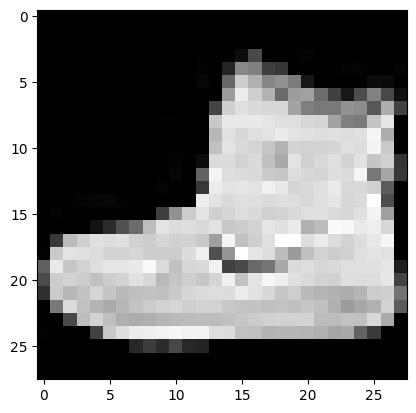

In [ ]:
plt.imshow(image, 'gray')
plt.show()

In [ ]:
# (28, 28) -> (1, 28, 28, 1)
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

In [ ]:
image.dtype

# int 타입을 모델에 넣으면 에러 난다

dtype('uint8')

In [ ]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

# Conv2D layer

In [ ]:
conv_layer = tf.keras.layers.Conv2D(3, 3, 1, padding='same')

In [ ]:
# image 를 레이어에 넣어주고 output 을 확인해볼수 있다!
conv_output = conv_layer(image)  # 입력 (1, 28, 28, 1) => 출력 (1, 28, 28, 3)

conv_output.shape

TensorShape([1, 28, 28, 3])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(5, 3, 1, padding='VALID')
conv_output = conv_layer(image)  # 입력 (1, 28, 28, 1) => ()

conv_output.shape

TensorShape([1, 26, 26, 5])

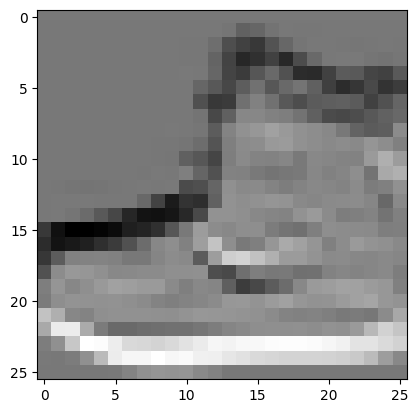

In [ ]:
# 첫번째 채널만 시각화 해보자
plt.imshow(conv_output[0, :, :, 0], 'gray')
plt.show() # 합성곱 한 결과

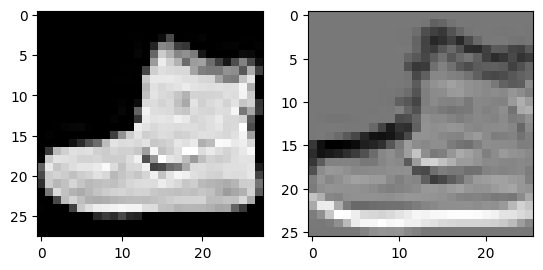

In [ ]:
# 원본 이미지와 비교
plt.subplot(1, 2, 1)
plt.imshow(image[0, :, :, 0], 'gray')

plt.subplot(1, 2, 2)
plt.imshow(conv_output[0, :, :, 0], 'gray')

plt.show()


In [ ]:
# 원본 이미지 값의 범위
np.min(image), np.max(image)

(np.float32(0.0), np.float32(255.0))

In [ ]:
# Conv2D 를 거치면서 변한 값들
np.min(conv_output), np.max(conv_output)

(np.float32(-191.84895), np.float32(231.84709))

## layer 의 get_weights()

In [ ]:
weights = conv_layer.get_weights() # array 2개가 담긴 list 리턴
print(weights[0].shape, weights[1].shape)

# [0] 번째는 weight -> (3, 3, 1, 5) (kernel_h, kernel_w, input_channel, filter개수)
# [1] 번째는 bias -> (5,) (filter 개수)

weights

(3, 3, 1, 5) (5,)


[array([[[[ 0.30609575,  0.12825647, -0.01352978, -0.22838275,
           -0.31695843]],
 
         [[ 0.1894733 ,  0.05399331,  0.15931273,  0.13277626,
           -0.16129097]],
 
         [[ 0.0685339 ,  0.13793817,  0.24178723, -0.32672223,
            0.05463061]]],
 
 
        [[[ 0.02771869,  0.26241216, -0.25948238,  0.22789416,
            0.15593705]],
 
         [[-0.09241423, -0.26111245, -0.0809598 , -0.10126337,
           -0.12589233]],
 
         [[ 0.22681126,  0.17946705, -0.2376492 ,  0.2975286 ,
           -0.2978708 ]]],
 
 
        [[[-0.0831767 ,  0.17112479,  0.11096755, -0.31525645,
            0.2968903 ]],
 
         [[-0.26327056,  0.2686024 , -0.16977724, -0.2015187 ,
            0.04298982]],
 
         [[-0.2978763 , -0.1086344 , -0.29355368,  0.13650784,
           -0.13989544]]]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [ ]:
# layer의 param 개수
weights[0].size + weights[1].size

50

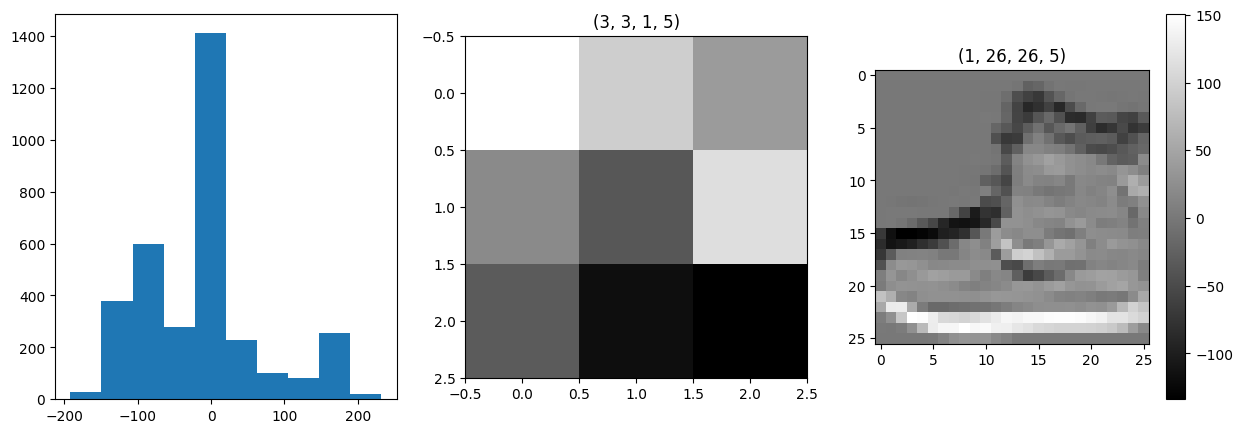

In [ ]:
# 시각화
#  1. 이미지 히스토그램,   2. filter    3 output

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(conv_output.numpy().ravel())

plt.subplot(132)
plt.title(weights[0].shape)
plt.imshow(weights[0][:, :, 0, 0], 'gray')

plt.subplot(133)
plt.title(conv_output.shape)  # (1, 26, 26, 5)
plt.imshow(conv_output[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()

# ReLU 레이어
![](https://blog.kakaocdn.net/dn/vgJna/btqQzRGmwcO/TK3KTMlz4CYag8rBTKfYkK/img.png)


In [ ]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(conv_output)

print(act_output.shape) #(1, 26, 26, 5) shape 변화 없다

act_output # 음수값은 안보일거다

(1, 26, 26, 5)


<tf.Tensor: shape=(1, 26, 26, 5), dtype=float32, numpy=
array([[[[  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         ...,
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ]],

        [[  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ],
         ...,
         [  0.        ,   0.        ,   0.        ,   0.13650784,
            0.        ],
    

In [ ]:
# 0 미만의 값들은 0으로 바뀌었다!
np.min(act_output), np.max(act_output)

(np.float32(0.0), np.float32(231.84709))

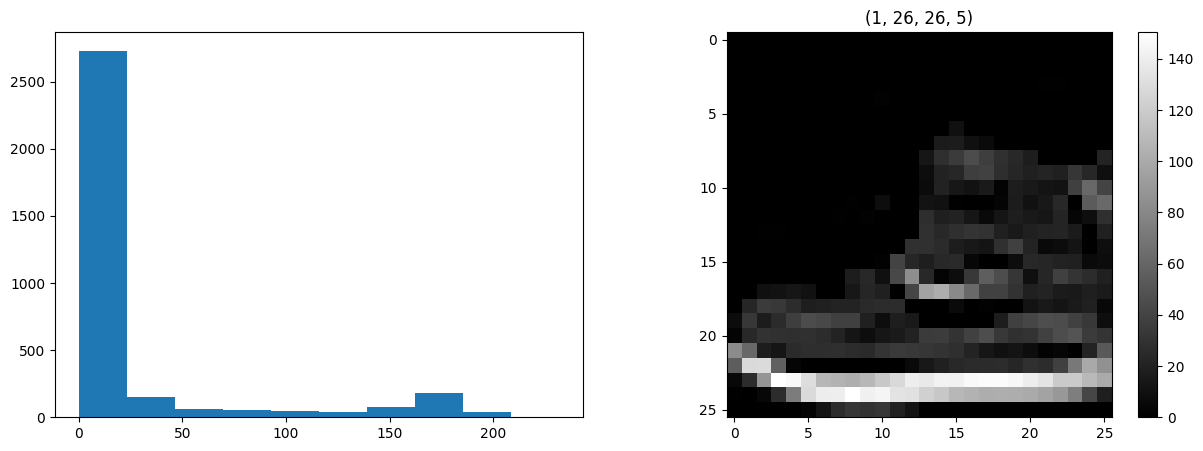

In [ ]:
# 시각화
#  1. 이미지 히스토그램,   3 output

plt.figure(figsize=(15, 5))

# 1 히스토그램
plt.subplot(121)
plt.hist(act_output.numpy().ravel())

# 3 act_output
plt.subplot(122)
plt.title(act_output.shape)  # (1, 28, 28, 5)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()


# MaxPool2D 레이어

In [ ]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2))

pool_output = pool_layer(act_output) # (1, 13, 13, 5) <- (1, 26, 26, 5)
print(pool_output.shape)

(1, 13, 13, 5)


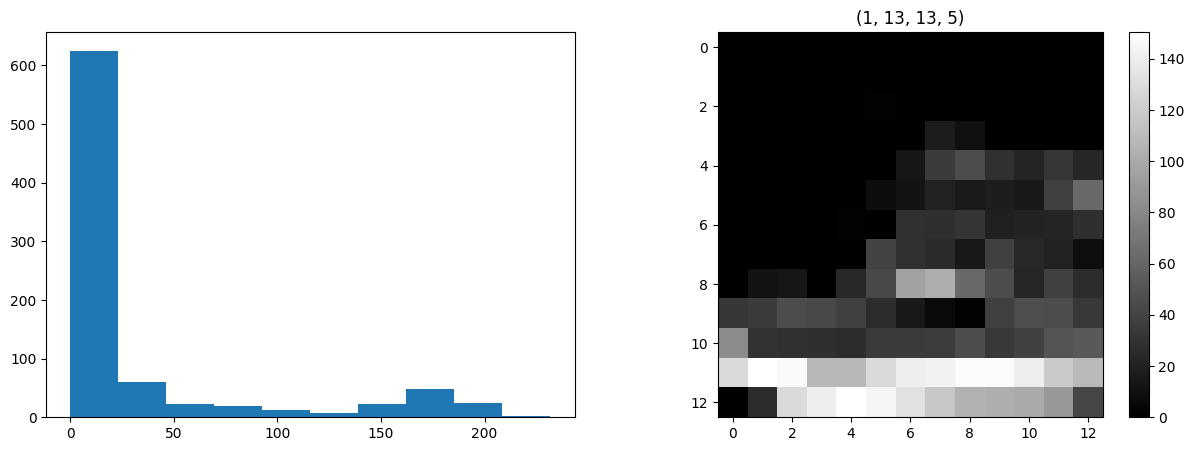

In [ ]:
# 시각화
#  1. 이미지 히스토그램,   3 output

plt.figure(figsize=(15, 5))

# 1 히스토그램
plt.subplot(121)
plt.hist(pool_output.numpy().ravel())

# 3
plt.subplot(122)
plt.title(pool_output.shape)  # (1, 13, 13, 5)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()


# Flattern 레이어

In [ ]:
flat_layer = tf.keras.layers.Flatten()

flat_output = flat_layer(pool_output) # (1, 845) <- (1, 13, 13, 5)